In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


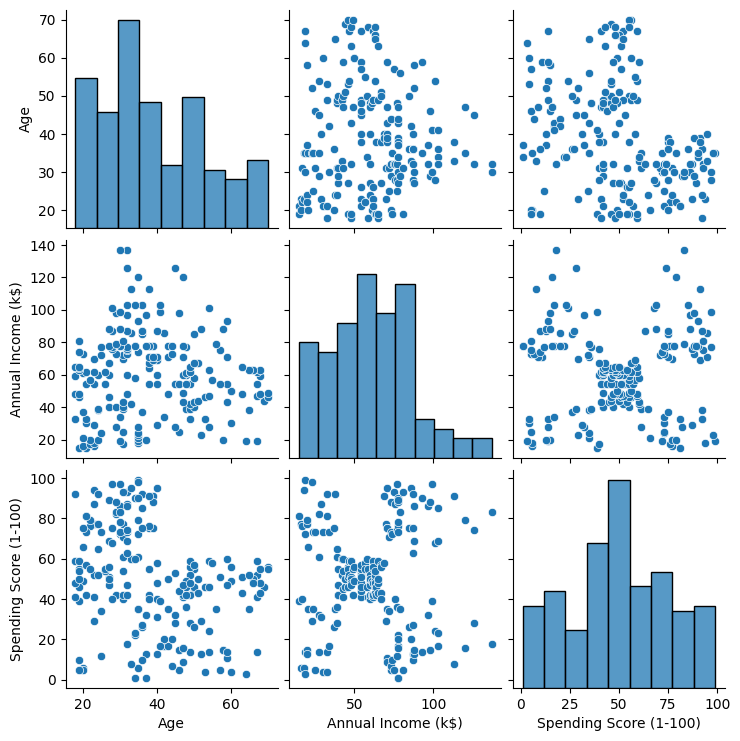

In [ ]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


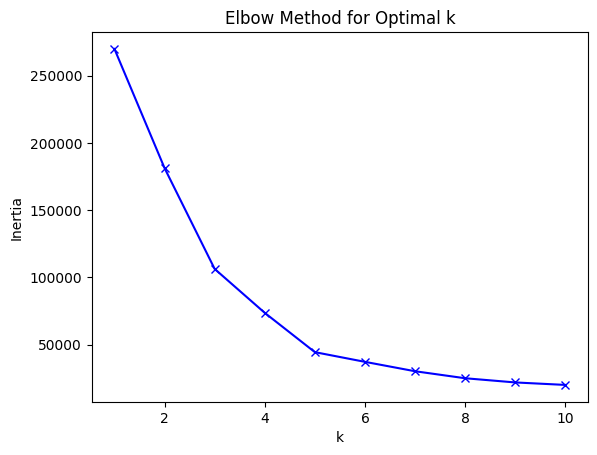

In [ ]:

inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


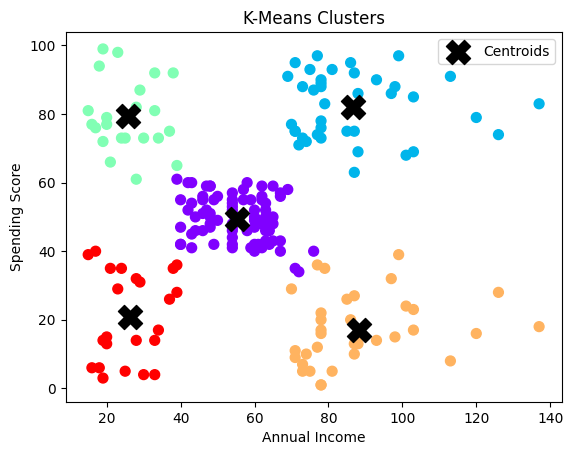

K-Means Silhouette Score: 0.553931997444648
K-Means Inertia: 44448.45544793369


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='rainbow', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='black', marker='X', label='Centroids')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.title("K-Means Clusters")
plt.show()


sil_kmeans = silhouette_score(X, y_kmeans)
print("K-Means Silhouette Score:", sil_kmeans)
print("K-Means Inertia:", kmeans.inertia_)


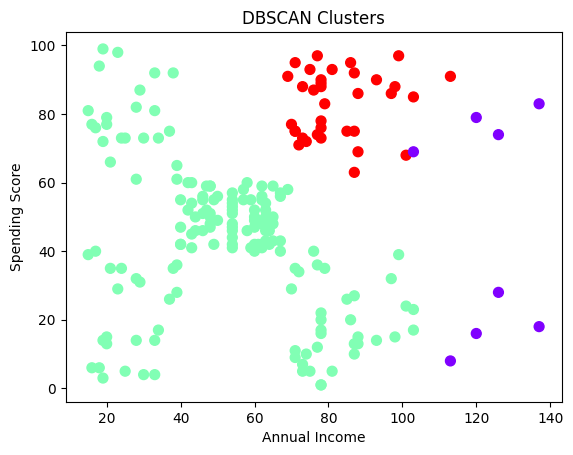

DBSCAN Silhouette Score: 0.35044619989666004
DBSCAN Cluster Sizes: (array([-1,  0,  1]), array([  8, 157,  35]))


In [ ]:

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

plt.scatter(X[:,0], X[:,1], c=y_dbscan, cmap='rainbow', s=50)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("DBSCAN Clusters")
plt.show()


labels = y_dbscan
sil_dbscan = silhouette_score(X_scaled, labels) if len(set(labels))>1 else -1
print("DBSCAN Silhouette Score:", sil_dbscan)
print("DBSCAN Cluster Sizes:", np.unique(labels, return_counts=True))


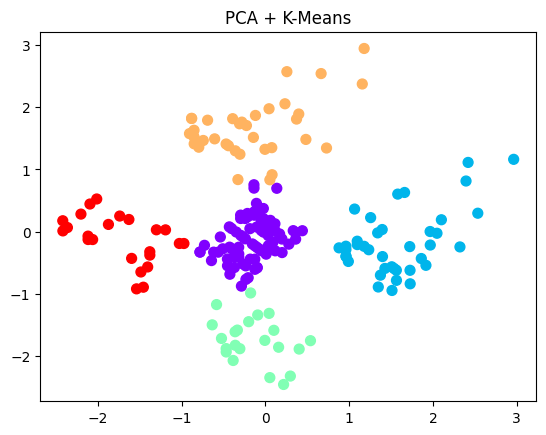

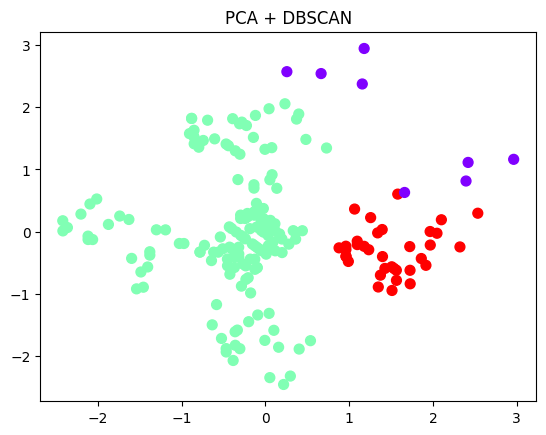

In [ ]:
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_kmeans, cmap="rainbow", s=50)
plt.title("PCA + K-Means")
plt.show()

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_dbscan, cmap="rainbow", s=50)
plt.title("PCA + DBSCAN")
plt.show()


Key Questions / Analysis / Interpretation to be Evaluated

1. How many natural customer segments are there in the
dataset?
- From the Elbow method, natural segmentation is around 5 clusters (K-Means).
- DBSCAN found fewer clusters + noise (depends on eps), often 3–4 clusters.

2. What is the optimal number of clusters (for K-Means)?
- 5 clusters (best balance of inertia reduction + silhouette score ≈ 0.55).

3. How does DBSCAN perform compared to K-Means for
density-based clustering?
- DBSCAN does not require specifying cluster count.
- It detects arbitrary shapes and noise.
- On this dataset, DBSCAN may classify some customers as noise (label = -1).
- K-Means is better for well-separated circular clusters, DBSCAN is robust for density-based clusters.

4. What do inertia and silhouette scores reveal about clustering
performance?
- Inertia (K-Means): Decreases as clusters increase; shows compactness.
- Silhouette Score:

- K-Means ~ 0.55 → good clustering.

- DBSCAN depends on parameters; sometimes lower silhouette due to noise.

5. How can clusters be interpreted for business decision-making?

- Cluster 1 (High income, high spenders) → VIP customers (target with loyalty programs).

- Cluster 2 (High income, low spenders) → Need targeted campaigns to increase engagement.

- Cluster 3 (Low income, high spenders) → Price-sensitive but loyal group (give discounts).

- Cluster 4 (Low income, low spenders) → Minimal business value.

- Cluster 5 (Middle income, medium spenders) → Balanced customers, potential growth.

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

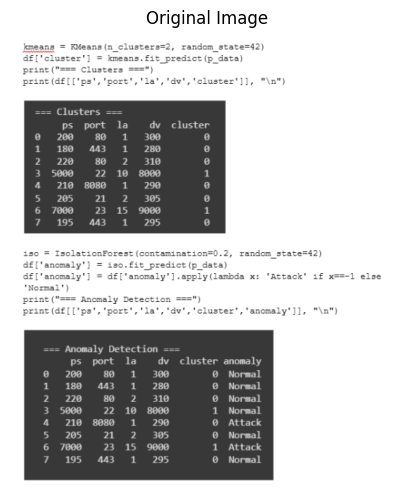

In [28]:
# Load image (use raw string or forward slashes)
img = cv2.imread(r'C:\Users\Hp\OneDrive\Desktop\4.4.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [29]:
# Flatten image to 2D array of pixels
pixel_data = img.reshape((-1, 3))
pixel_data = np.float32(pixel_data)

In [30]:
# Number of colors / clusters
k = 8  # Change to 4, 16, etc. for different compression levels

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixel_data)

# Replace each pixel with its cluster center
compressed_img = kmeans.cluster_centers_[kmeans.labels_]
compressed_img = compressed_img.reshape(img.shape)
compressed_img = np.uint8(compressed_img)

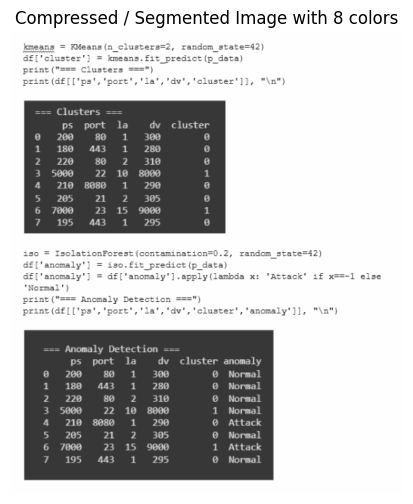

In [31]:
plt.figure(figsize=(6,6))
plt.imshow(compressed_img)
plt.title(f"Compressed / Segmented Image with {k} colors")
plt.axis('off')
plt.show()

In [33]:
cv2.imwrite('compressed_image.png', cv2.cvtColor(compressed_img, cv2.COLOR_RGB2BGR))

True